# Preparing

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rc('font', size=14)
plt.style.use('tableau-colorblind10')

# Import dataset

In [ ]:
data = pd.read_excel (r'/content/train.xlsx', sheet_name='train')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
data.shape

(9800, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

# Preprocessing & Data Analysis



> **Preprocessing**



In [ ]:
data['order_date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['ship_date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)

In [ ]:
# Create `Year-Month`, 'year' and 'month' columns.
data['YearMonth'] = data['order_date'].apply(lambda x: x.strftime("%Y-%m"))
data['year'] = data['order_date'].dt.year
data['month'] = data['order_date'].dt.month_name()

In [ ]:
data['shipInDays'] = (data['ship_date'] - data['order_date']).dt.days

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,order_date,ship_date,YearMonth,year,month,shipInDays
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11-08,2017-11-11,2017-11,2017,November,3
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11-08,2017-11-11,2017-11,2017,November,3
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06-12,2017-06-16,2017-06,2017,June,4
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10-11,2016-10-18,2016-10,2016,October,7
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10-11,2016-10-18,2016-10,2016,October,7


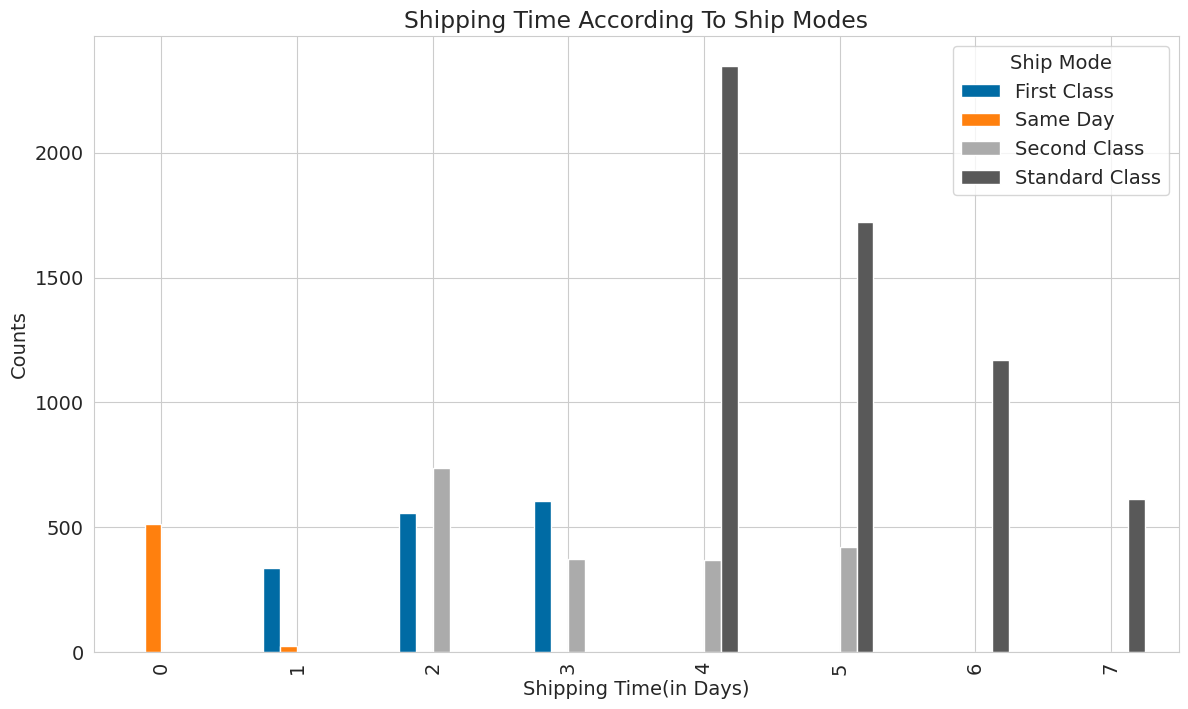

In [ ]:
# Mức độ tương quan giữa thời gian vận chuyển và chế độ vận chuyển
a = data.groupby(by = ['shipInDays', 'Ship Mode']).count()['Order ID']

# plot
a.unstack().plot(kind='bar', figsize=(14, 8))

plt.xlabel("Shipping Time(in Days)")
plt.ylabel("Counts")
plt.title("Shipping Time According To Ship Modes")

plt.show()

In [ ]:
# Giả sử thời gian giao hàng trung bình là 4 ngày. Nếu Shipping Time > 4: Giao trễ
data['is_delayed'] = data.shipInDays > 4

features = ['Order ID','Customer ID', 'Product ID', 'order_date', 'ship_date', 'Product Name', 'Country', 'Region', 'State', 'City',
            'Segment', 'Category', 'Sub-Category', 'Ship Mode', 'YearMonth', 'year', 'month', 'shipInDays', 'is_delayed', 'Sales']

df = data[features]
df['is_delayed'] = df.is_delayed.map({True:1, False:0})
df.head(2)

,Order ID,Customer ID,Product ID,order_date,ship_date,Product Name,Country,Region,State,City,Segment,Category,Sub-Category,Ship Mode,YearMonth,year,month,shipInDays,is_delayed,Sales
0,CA-2017-152156,CG-12520,FUR-BO-10001798,2017-11-08,2017-11-11,Bush Somerset Collection Bookcase,United States,South,Kentucky,Henderson,Consumer,Furniture,Bookcases,Second Class,2017-11,2017,November,3,0,261.96
1,CA-2017-152156,CG-12520,FUR-CH-10000454,2017-11-08,2017-11-11,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",United States,South,Kentucky,Henderson,Consumer,Furniture,Chairs,Second Class,2017-11,2017,November,3,0,731.94


In [ ]:
df['day_of_week'] = df.order_date.dt.weekday

In [ ]:
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()



> **Data analys**



In [ ]:
top_cities= df.groupby("City").sum().sort_values("Sales",ascending=False).head(15)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities

fig=px.bar(top_cities,x='City',y='Sales',title="Top 15 Cities",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
fig = px.pie(df, values=np.ones(9799), names='Ship Mode', title='Ship Mode',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
fig = px.pie(df, values=np.ones(9799), names='Segment', title='Segment',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
fig = px.pie(df, values=np.ones(9799), names='Category', title='Category',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

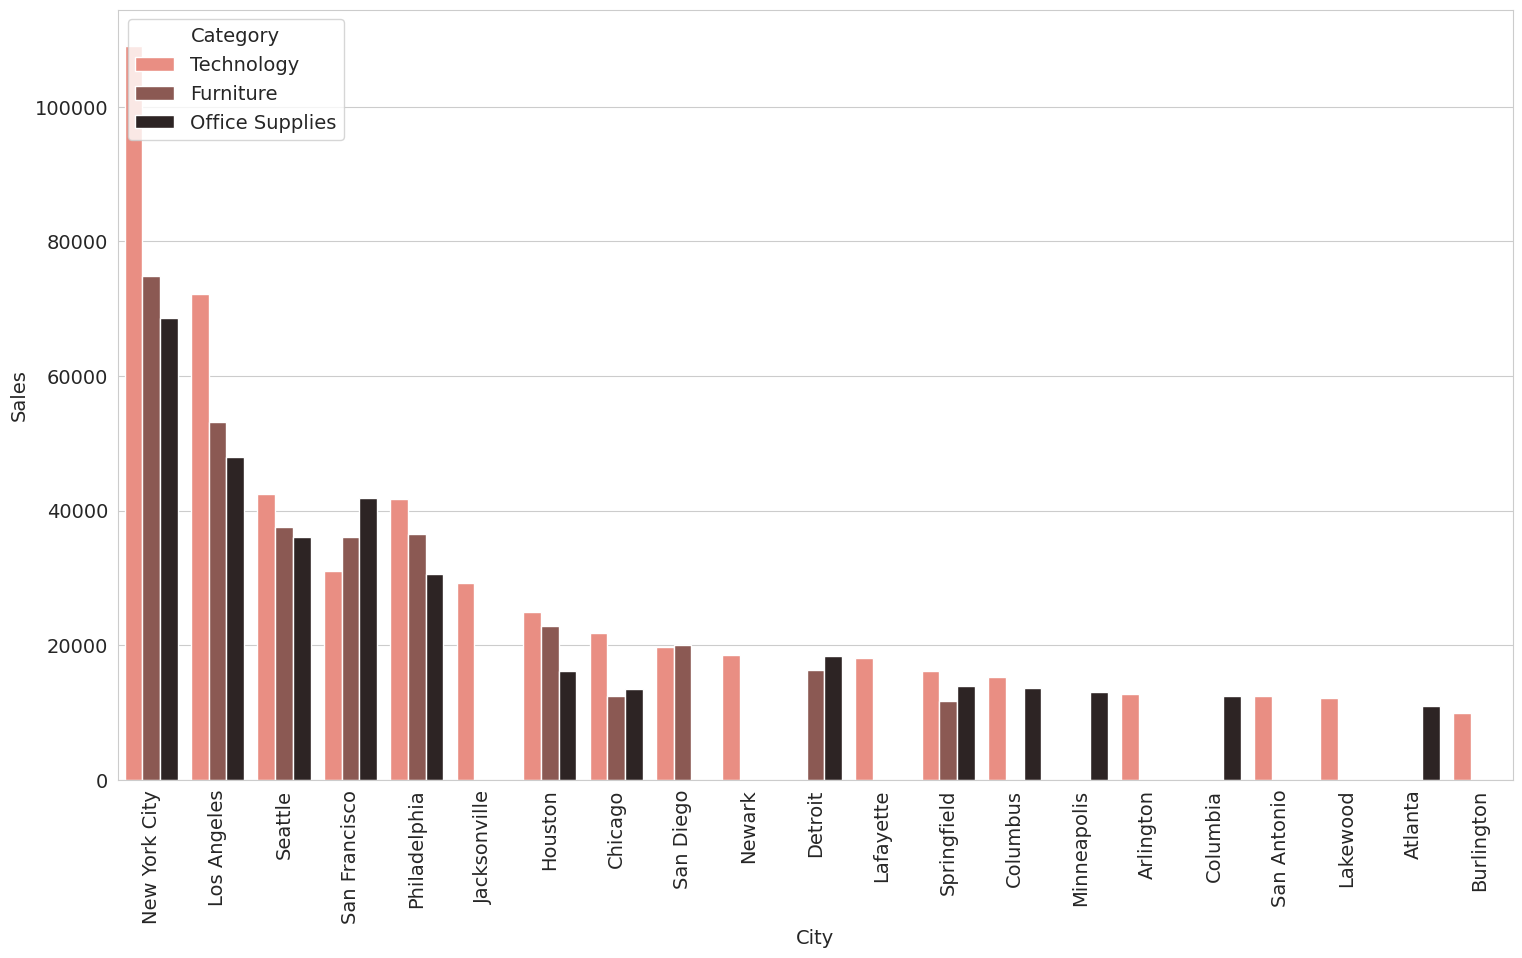

In [ ]:
plt.figure(figsize=(18,10))
top_cities= df.groupby(["City","Category"]).sum().sort_values("Sales",ascending=False).head(40)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
sns.barplot(x='City',y='Sales',hue='Category',data=top_cities,palette='dark:salmon_r')
plt.xticks(rotation='vertical')
plt.show()

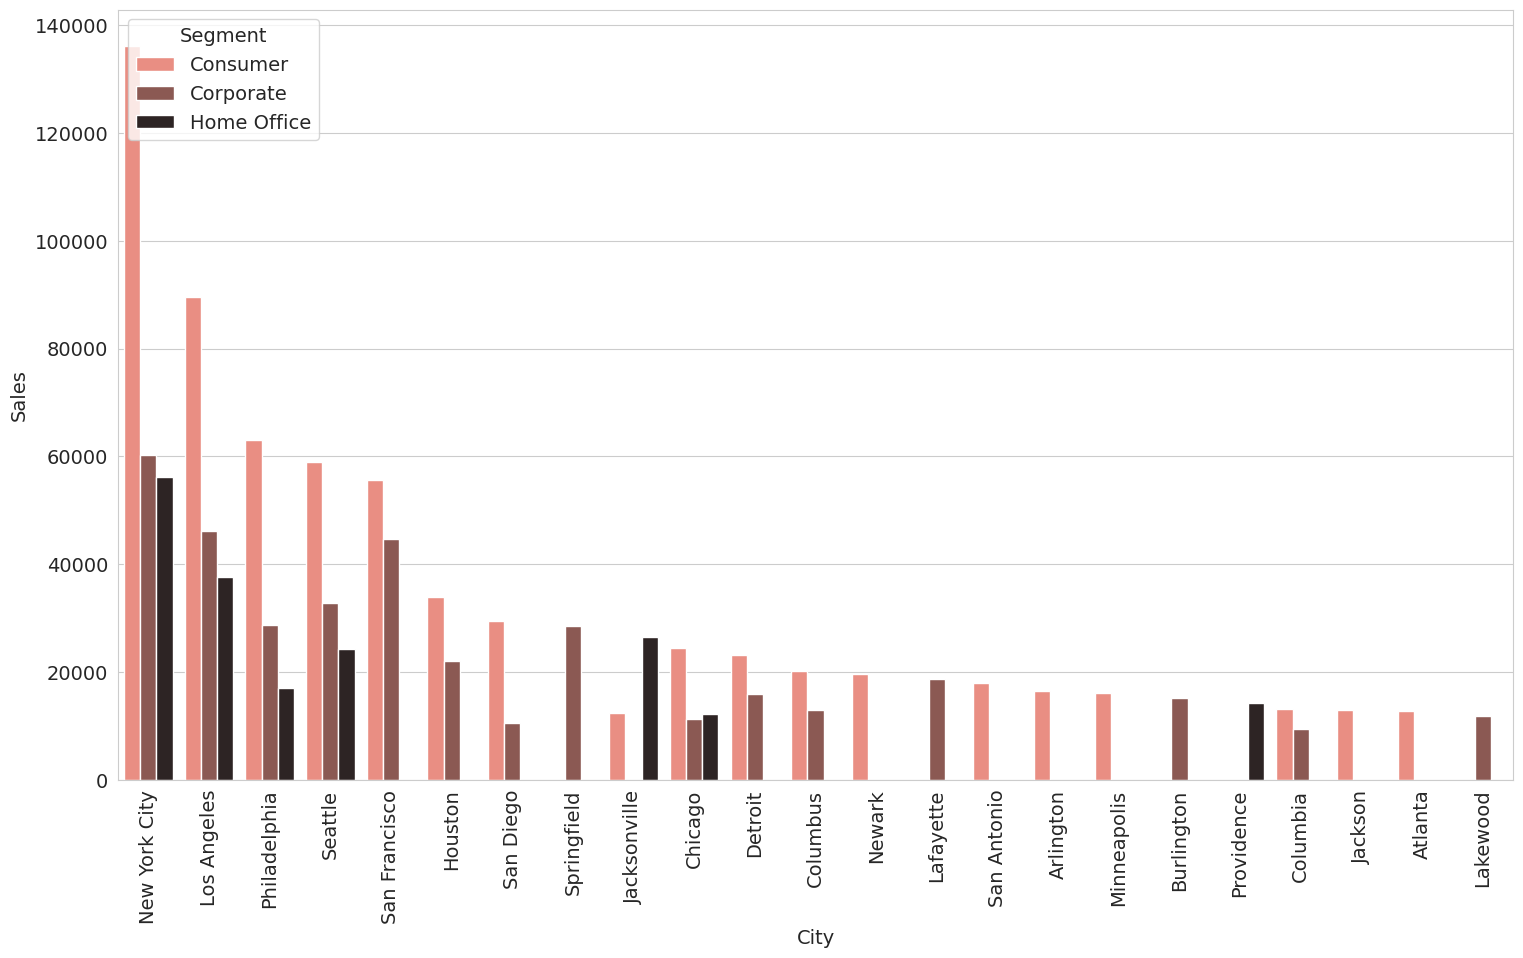

In [ ]:
plt.figure(figsize=(18,10))
top_cities= df.groupby(["City","Segment"]).sum().sort_values("Sales",ascending=False).head(40)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
sns.barplot(x='City',y='Sales',hue='Segment',data=top_cities,palette='dark:salmon_r')
plt.xticks(rotation='vertical')
plt.show()


# Trends và Seasonality



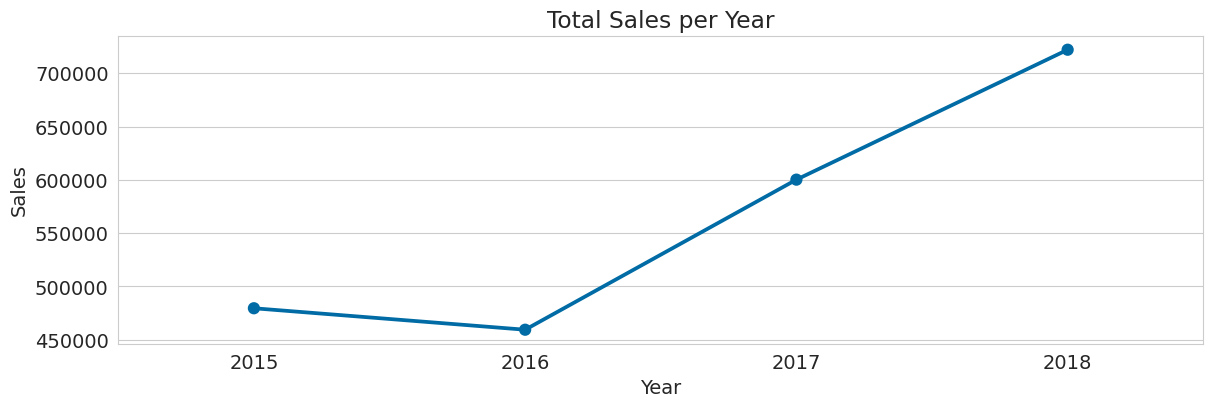

In [ ]:
# Quan sát xu hướng doanh thu
a = pd.DataFrame(df.groupby(by=['year']).sum())

plt.figure(figsize=(14, 4))
sns.pointplot(x=a.index, y='Sales', data=a)

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Total Sales per Year")

plt.show()

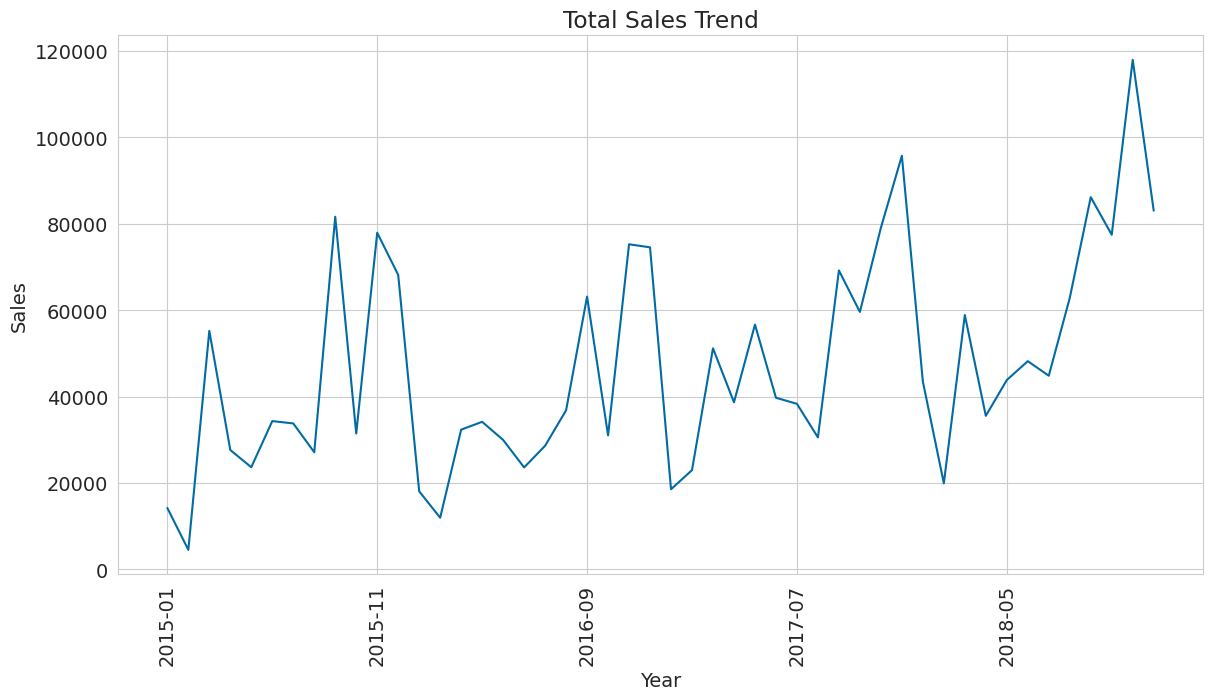

In [ ]:
#
a = pd.DataFrame(df.groupby(by=['YearMonth']).sum())['Sales']

plt.figure(figsize=(14, 7))
a.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Total Sales Trend")

plt.xticks(rotation=90)
plt.show()

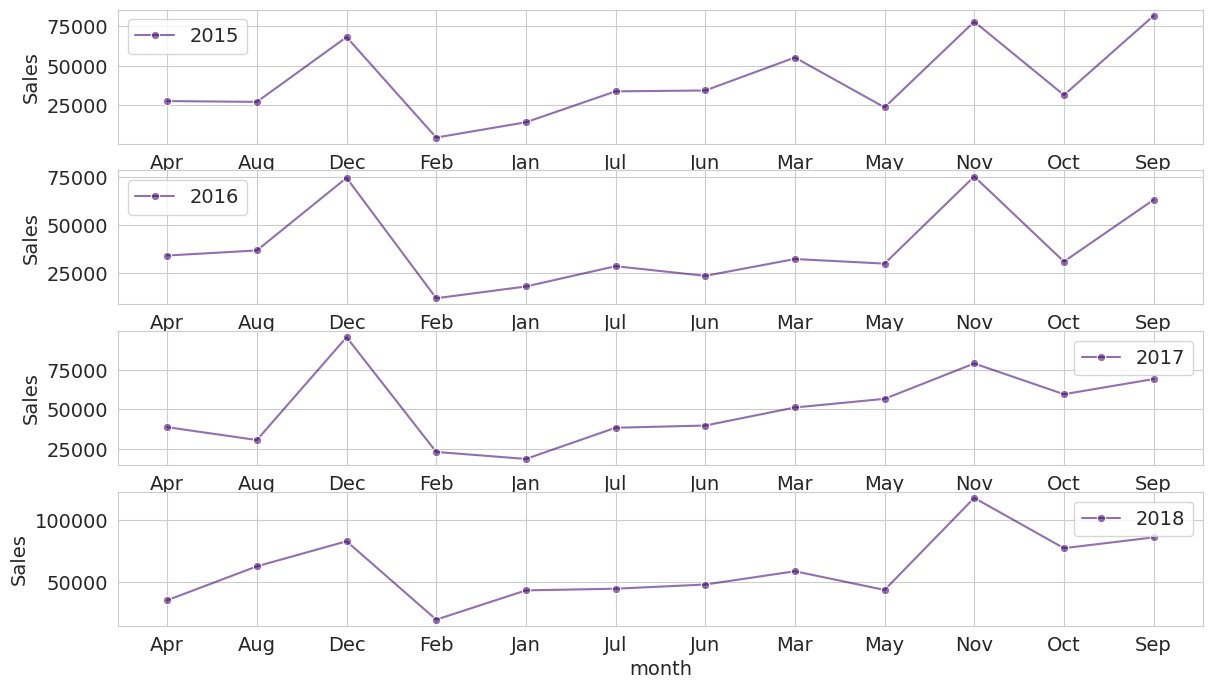

In [ ]:
# Tính mùa vụ
monthSales_data = df.groupby(by=['year', 'month']).sum()

a = monthSales_data.reset_index()
a['month'] = a.month.apply(lambda x:x[:3])
monthSales_data = a.groupby(by=['year', 'month']).sum()['Sales']

# plot
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 8))

yrs = [2015, 2016, 2017, 2018]
for i in range(4):
    yr = yrs[i]
    a = monthSales_data.loc[yr]
    ax[i] = sns.lineplot(x= a.index, y=a.values, data=a, ax=ax[i], label=yr, marker="o", color="#3F007190")
    ax[i].set_ylabel('Sales')

plt.show()



> Từ năm 2015 đến 2018, người tiêu dùng có xu hướng mua hàng nhiều hơn vào cuối năm (Tháng 12, 11, và 9).




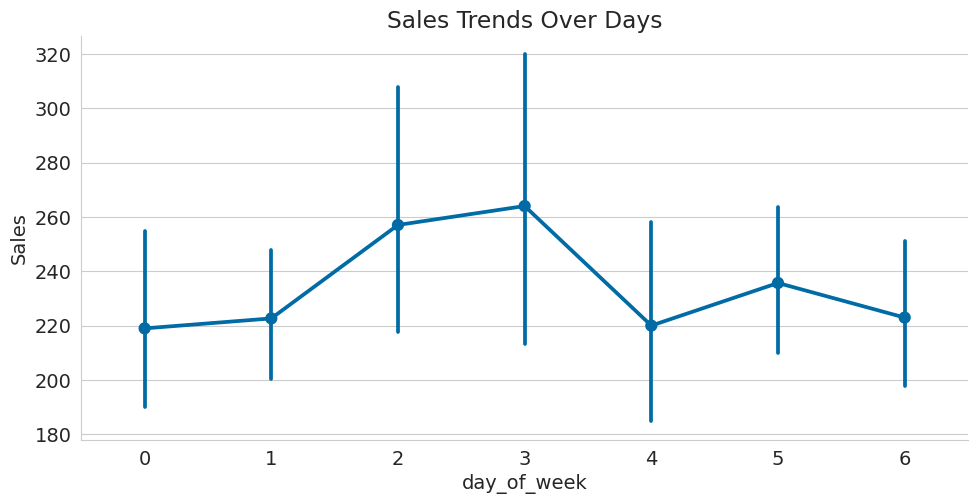

In [ ]:
# Xu hướng mua hàng theo ngày5
sns.catplot(data=df, x='day_of_week', y='Sales', kind='point', aspect=2)

plt.title("Sales Trends Over Days")
plt.show()



> Doanh thu đạt nhiều nhất vào thứ 3 và thứ 4



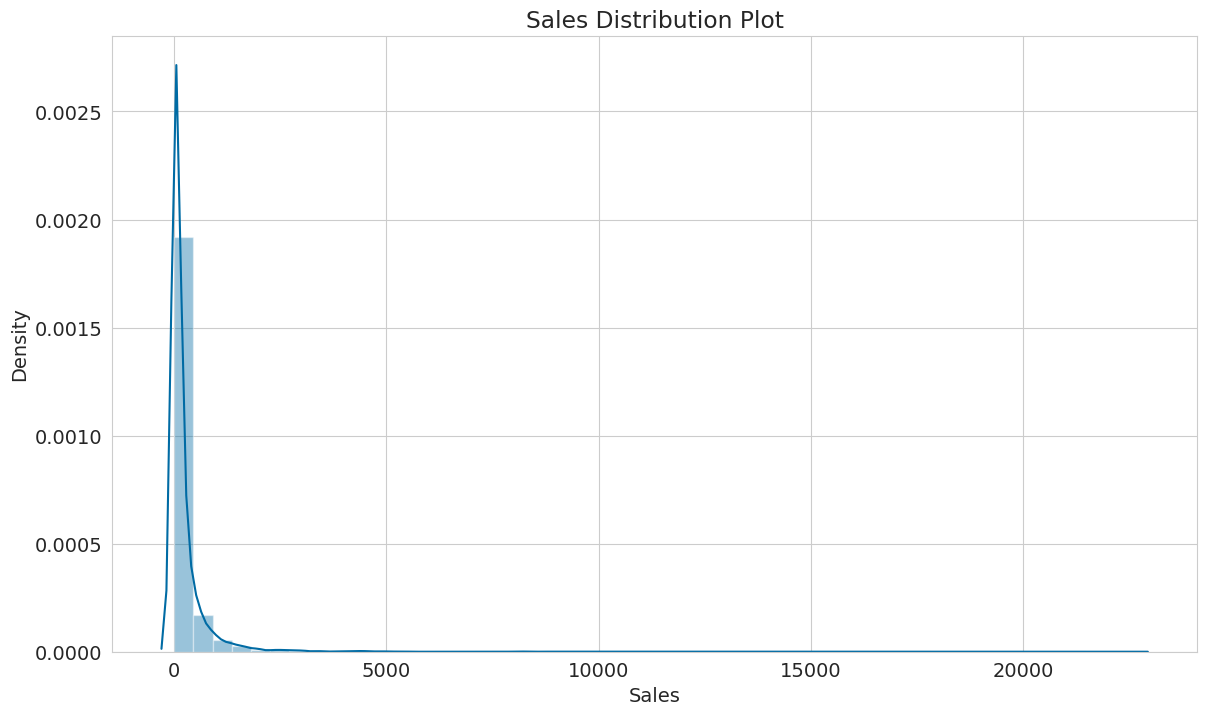

In [ ]:
# Phân phối doanh thu
plt.figure(figsize=(14, 8))
sns.distplot(data.Sales)

plt.title('Sales Distribution Plot')
plt.show()

# Kiểm định tính Stationary


In [ ]:
from statsmodels.tsa.stattools import adfuller

sales_data = df[['order_date', 'Sales']]
sales_data = sales_data.set_index('order_date')

print("Augmented Dickey-fuller test result: ")
result = adfuller(sales_data, autolag="AIC")

print("ADF test statistic: ", result[0])
print("p-value:", result[1])

print("Critical Values:")
for key, val in result[4].items():
    print("\t%s : %f" %(key, val))

Augmented Dickey-fuller test result: 
ADF test statistic:  -98.33059943935697
p-value: 0.0
Critical Values:
	1% : -3.431018
	5% : -2.861835
	10% : -2.566927




> Vì ADF < -3,43
Tức là bác bỏ H0. Vậy dữ liệu có tính stationary




# Prediction - SARIMA

In [ ]:
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

sales = pd.DataFrame(df.groupby(by=['order_date']).sum()['Sales'])

# Fitting SARIMA model
model = sm.tsa.statespace.SARIMAX(sales,order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()
print("SARIMAX Summary")
print(result.summary().tables[1])

SARIMAX Summary
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0821      0.029      2.833      0.005       0.025       0.139
ma.L1         -0.9999      0.068    -14.784      0.000      -1.133      -0.867
ar.S.L12       0.0182      0.023      0.810      0.418      -0.026       0.062
ma.S.L12      -0.9980      0.070    -14.191      0.000      -1.136      -0.860
sigma2      5.076e+06   1.06e-08   4.78e+14      0.000    5.08e+06    5.08e+06


In [ ]:
sales['Forecast']= pd.DataFrame(result.predict(start='2018-04-07', end='2018-12-30', dynamic=False))


In [ ]:
actual = sales.loc['2018-04-07':'2018-12-30']['Sales']
preds = sales.loc['2018-04-07':'2018-12-30']['Forecast']
rmse_sarima = sqrt(mean_squared_error(preds, actual))
mae = mean_absolute_error(actual, preds)
mape = np.mean(np.abs((actual - preds) / actual)) * 100

print("RMSE for SARIMAX:", rmse_sarima)
print('MAE for SARIMAX:', mae)
print('MAPE for SARIMAX:', mape)

RMSE for SARIMAX: 2411.588136557761
MAE for SARIMAX: 1740.4289110895072
MAPE for SARIMAX: 705.6519365195944


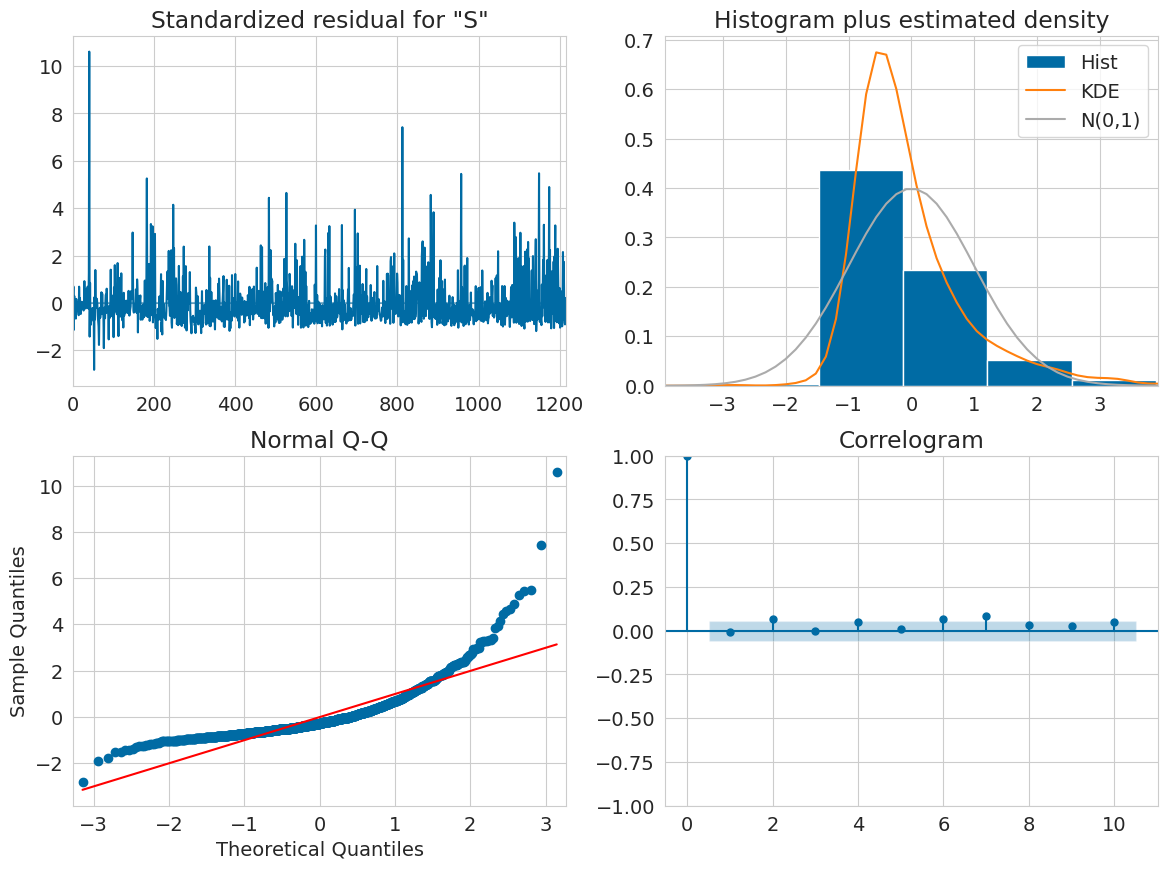

In [ ]:
result.plot_diagnostics(figsize=(14, 10))
plt.show()

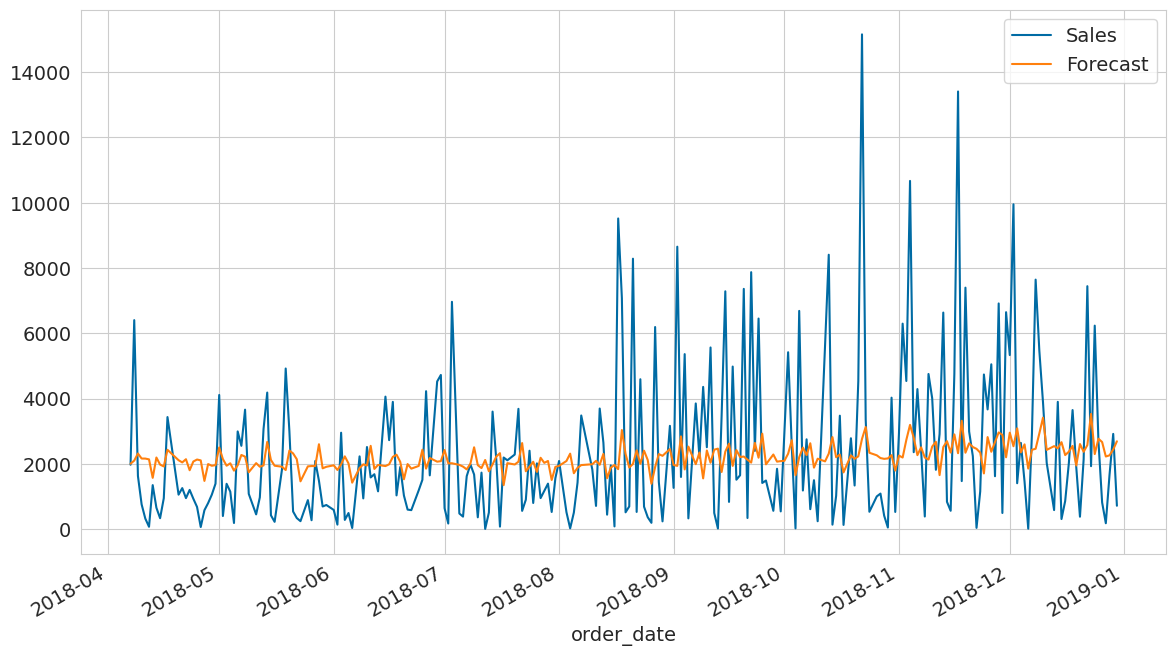

In [ ]:
sales['Forecast']= pd.DataFrame(result.predict(start='2018-04-07', end='2018-12-30', dynamic=False))

# visualization for the same
sales.tail(246).plot(figsize=(14, 8))
plt.show()

# Prediction - XGBoost

In [ ]:
from xgboost import XGBRegressor

xgb_sales = pd.DataFrame(df.groupby(by=['order_date']).sum())

x = xgb_sales.drop('Sales', axis=1)
y = xgb_sales['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42, shuffle=False)

model = XGBRegressor(learning_rate=0.03, max_depth=1,)
model.fit(x_train, y_train)

preds = model.predict(x_test)


,year,shipInDays,is_delayed,day_of_week
order_date,,,,
2015-01-03,2015,4,0,5
2015-01-04,6045,12,0,18
2015-01-05,2015,7,1,0
2015-01-06,18135,31,0,9
2015-01-07,4030,10,2,4
...,...,...,...,...
2018-04-01,24216,38,1,72
2018-04-02,10090,16,1,0
2018-04-03,4036,6,0,2


In [ ]:
rmse_xgb = sqrt(mean_squared_error(y_test, preds))
mae_xgb = mean_absolute_error(y_test, preds)
mape_xgb = np.mean(np.abs((y_test - preds) / y_test)) * 100

print("RMSE for XGBoost:", rmse_xgb)
print('MAE for XGBoost:', mae_xgb)
print('MAPE for XGBoost:', mape_xgb)

RMSE for XGBoost: 1928.2157398981496
MAE for XGBoost: 1277.971147280313
MAPE for XGBoost: 257.63469062423826


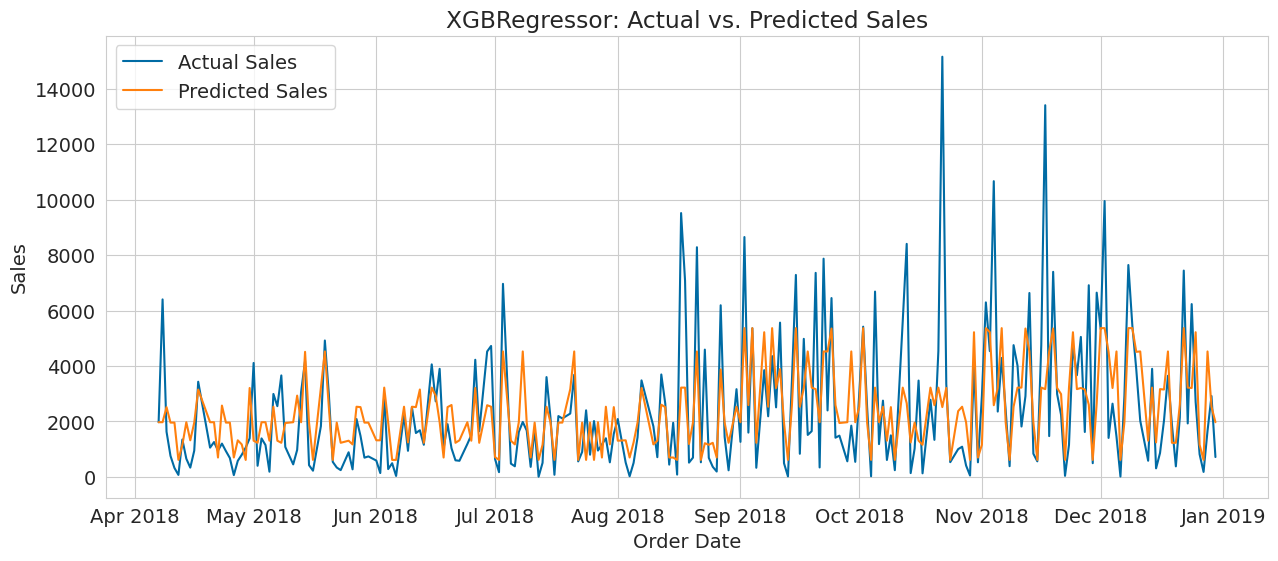

In [ ]:
plt.figure(figsize=(15, 6))
# Create a line plot of predicted and actual sales values
plt.plot(y_test.index, y_test.values, label='Actual Sales')
plt.plot(y_test.index, preds, label='Predicted Sales')

# Set plot title and axis labels
plt.title('XGBRegressor: Actual vs. Predicted Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
import matplotlib.dates as mdates
# Customize the x-axis labels to show only the month and year
date_fmt = mdates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_fmt)

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Create a dictionary with the evaluation metrics
data = {'RMSE': [rmse_sarima, rmse_xgb],
        'MAE': [mae, mae_xgb],
        'MAPE': [mape, mape_xgb]}

# Create a dataframe from the dictionary
df = pd.DataFrame(data, index=['SARIMA', 'XGBoost'])

# Show the dataframe
print(df)

                RMSE          MAE        MAPE
SARIMA   2411.588137  1740.428911  705.651937
XGBoost  1928.215740  1277.971147  257.634691
